### Final end-to-end procedure

We will now run the full conformal procedure, randomly shuffling the data into a calibration and test set, before using the best lambda found on calibration to evaluate using hierarchical loss on test. Lets see how far the test loss diverges from the best lambda's loss (which we know is within our threshold of sampling proteins with at least the same superfamily).

In [1]:
from protein_conformal.util import get_sims_labels, get_thresh_hierarchical, get_hierarchical_loss
import numpy as np
near_ids = np.load('clean_new_v_ec_cluster.npy', allow_pickle=True)

/home/seyonec/.conda/envs/clean/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
len(near_ids)

392

### Try max hierarchical loss
Taking the max over the set of retrieved proteins within our similarity threshold may be better, as it increases monotonically.

In [4]:
from protein_conformal.util import get_sims_labels, get_hierarchical_max_loss, get_thresh_max_hierarchical
import numpy as np
near_ids = np.load('clean_new_v_ec_cluster.npy', allow_pickle=True)

sims, _ = get_sims_labels(near_ids, partial=False)

x = np.linspace(min(sims.flatten()), max(sims.flatten()), 1000)

min(x), max(x)

(0.5880813598632812, 25.599563598632812)

In [3]:
loss = []
for l in x: ## Do not reverse your lambdas, because these are euclidean distances not cosine similarities!
    loss.append(get_hierarchical_max_loss(near_ids, l, sim = "euclidean"))



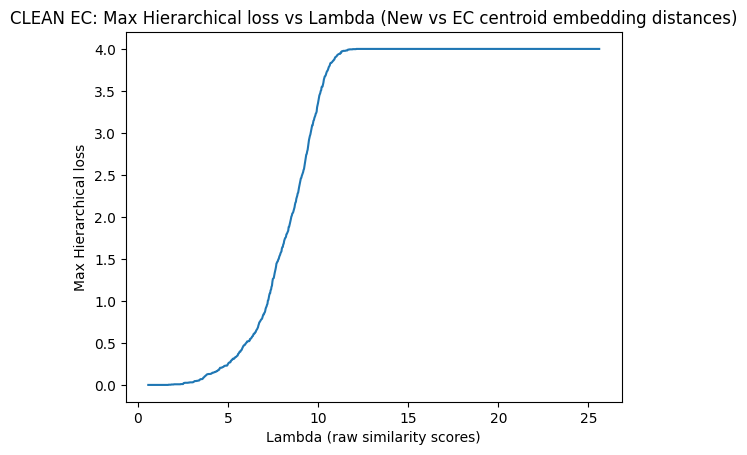

In [4]:
import matplotlib.pyplot as plt
plt.plot(x, loss)
plt.xlabel('Lambda (raw similarity scores)')
plt.ylabel('Max Hierarchical loss')
plt.title('CLEAN EC: Max Hierarchical loss vs Lambda (New vs EC centroid embedding distances)')
plt.show()


In [5]:
num_trials = 100
alpha = 1 # max avg. loss we want (on average, each protein retrieved is at most divergent at the family level only)
n_calib = 300 # NOTE: 300 calib, 100 test for now.
lhats = []
test_losses = []
for trial in range(num_trials):
    # Randomly split data into calibration and test sets
    np.random.shuffle(near_ids)
    cal_data = near_ids[:n_calib]
    test_data = near_ids[n_calib:]
    lhat, _ = get_thresh_max_hierarchical(cal_data, x, alpha, sim = "euclidean")

    test_loss = get_hierarchical_max_loss(test_data, lhat, sim = "euclidean")

    lhats.append(lhat)
    test_losses.append(test_loss)

    print(f'Trial {trial+1}: Lambda: {lhat:.2f}, Test loss: {test_loss:.2f}')
    
    #error, fraction_inexact, error_partial, fraction_partial = validate_lhat(test_data, lhat)
    #print(f'Trial {trial+1}: Ex&!Id/Ex: {error:.2f}, In/Id: {fraction_inexact:.2f}, Pa&!Id/Pa: {error_partial:.2f}, Pa&Id/Id: {fraction_partial:.2f}')


worst case loss: 4
Loss threshold: 0.99
Best lambda: 7.197722311850425
Loss of best lambda: 0.98
Trial 1: Lambda: 7.20, Test loss: 0.91
worst case loss: 4
Loss threshold: 0.99
Best lambda: 7.197722311850425
Loss of best lambda: 0.99
Trial 2: Lambda: 7.20, Test loss: 0.88
worst case loss: 4
Loss threshold: 0.99
Best lambda: 7.222758830607952
Loss of best lambda: 0.9866666666666667
Trial 3: Lambda: 7.22, Test loss: 1.07
worst case loss: 4
Loss threshold: 0.99
Best lambda: 7.247795349365479
Loss of best lambda: 0.9633333333333334
Trial 4: Lambda: 7.25, Test loss: 1.16
worst case loss: 4
Loss threshold: 0.99
Best lambda: 7.197722311850425
Loss of best lambda: 0.9666666666666667
Trial 5: Lambda: 7.20, Test loss: 0.96
worst case loss: 4
Loss threshold: 0.99
Best lambda: 7.247795349365479
Loss of best lambda: 0.99
Trial 6: Lambda: 7.25, Test loss: 1.08
worst case loss: 4
Loss threshold: 0.99
Best lambda: 7.197722311850425
Loss of best lambda: 0.9866666666666667
Trial 7: Lambda: 7.20, Test los

KeyboardInterrupt: 

Text(0.5, 1.0, 'Protein-vec (CLEAN): Histogram of Thresholds for New')

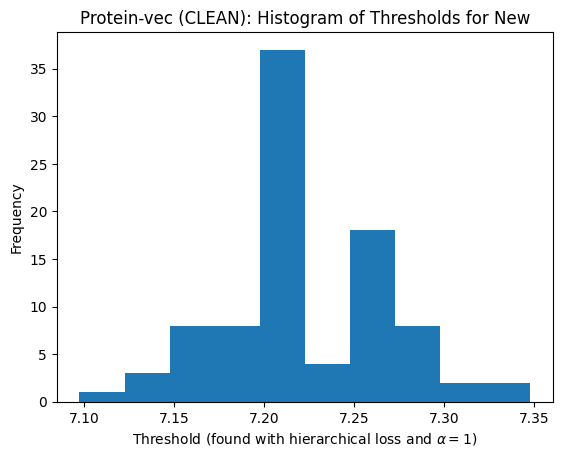

In [7]:
import matplotlib.pyplot as plt
plt.hist(np.array(lhats))
plt.xlabel(rf'Threshold (found with hierarchical loss and $\alpha = {alpha}$)')
plt.ylabel('Frequency')
plt.title('Protein-vec (CLEAN): Histogram of Thresholds for New')

Text(0.5, 1.0, 'Protein-vec: Histogram of Hierarchical Risk for New at $\\alpha = 1$')

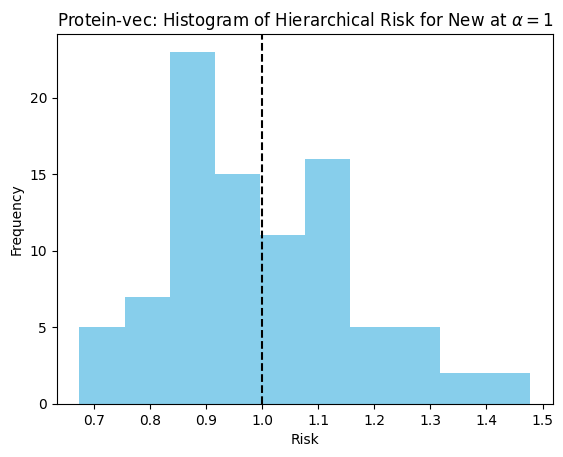

In [9]:
import matplotlib.pyplot as plt
plt.hist(np.array(test_losses), label='Risk', color='skyblue')
plt.axvline(alpha, color='black', linestyle='--')
plt.xlabel('Risk')
plt.ylabel('Frequency')
plt.title(rf'Protein-vec: Histogram of Hierarchical Risk for New at $\alpha = {alpha}$')

### Price

worst case loss: 4
Loss threshold: 0.97
Best lambda: 7.356424057925189
Loss of best lambda: 0.94
Trial 1: Lambda: 7.36, Test loss: 0.98
worst case loss: 4
Loss threshold: 0.97
Best lambda: 7.262626197603014
Loss of best lambda: 0.97
Trial 2: Lambda: 7.26, Test loss: 0.80
worst case loss: 4
Loss threshold: 0.97
Best lambda: 7.286075662683557
Loss of best lambda: 0.96
Trial 3: Lambda: 7.29, Test loss: 0.86
worst case loss: 4
Loss threshold: 0.97
Best lambda: 7.473671383327908
Loss of best lambda: 0.97
Trial 4: Lambda: 7.47, Test loss: 1.08
worst case loss: 4
Loss threshold: 0.97
Best lambda: 7.42677245316682
Loss of best lambda: 0.96
Trial 5: Lambda: 7.43, Test loss: 1.06
worst case loss: 4
Loss threshold: 0.97
Best lambda: 7.379873523005733
Loss of best lambda: 0.96
Trial 6: Lambda: 7.38, Test loss: 1.02
worst case loss: 4
Loss threshold: 0.97
Best lambda: 7.356424057925189
Loss of best lambda: 0.95
Trial 7: Lambda: 7.36, Test loss: 0.96
worst case loss: 4
Loss threshold: 0.97
Best lamb

Text(0.5, 1.0, 'Protein-vec: Histogram of Hierarchical Risk for Price at $\\alpha = 1$')

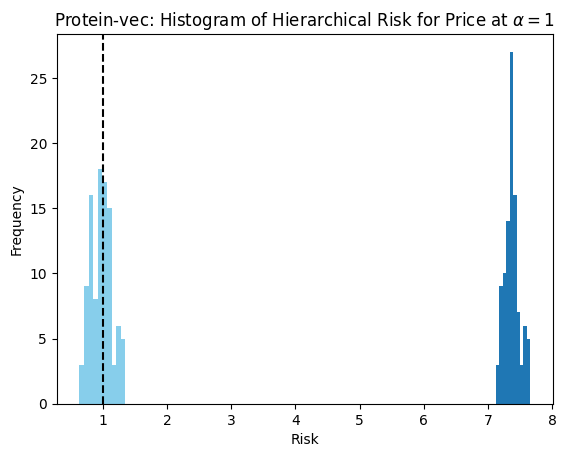

In [10]:
from protein_conformal.util import get_sims_labels, get_hierarchical_max_loss, get_thresh_max_hierarchical
import numpy as np
near_ids = np.load('clean_price_v_ec_cluster.npy', allow_pickle=True)

sims, _ = get_sims_labels(near_ids, partial=False)

x = np.linspace(min(sims.flatten()), max(sims.flatten()), 1000)

min(x), max(x)

num_trials = 100
alpha = 1 # max avg. loss we want (on average, each protein retrieved is at most divergent at the family level only)
n_calib = 100 # NOTE: 100 calib, 49 test for now.
lhats = []
test_losses = []
for trial in range(num_trials):
    # Randomly split data into calibration and test sets
    np.random.shuffle(near_ids)
    cal_data = near_ids[:n_calib]
    test_data = near_ids[n_calib:]
    lhat, _ = get_thresh_max_hierarchical(cal_data, x, alpha, sim = "euclidean")

    test_loss = get_hierarchical_max_loss(test_data, lhat, sim = "euclidean")

    lhats.append(lhat)
    test_losses.append(test_loss)

    print(f'Trial {trial+1}: Lambda: {lhat:.2f}, Test loss: {test_loss:.2f}')
    
    #error, fraction_inexact, error_partial, fraction_partial = validate_lhat(test_data, lhat)
    #print(f'Trial {trial+1}: Ex&!Id/Ex: {error:.2f}, In/Id: {fraction_inexact:.2f}, Pa&!Id/Pa: {error_partial:.2f}, Pa&Id/Id: {fraction_partial:.2f}')


Text(0.5, 1.0, 'Protein-vec (CLEAN): Histogram of Thresholds for Price')

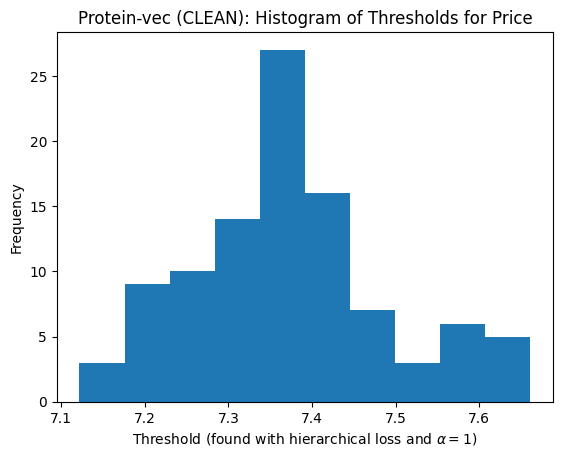

In [11]:
import matplotlib.pyplot as plt
plt.hist(np.array(lhats))
plt.xlabel(rf'Threshold (found with hierarchical loss and $\alpha = {alpha}$)')
plt.ylabel('Frequency')
plt.title('Protein-vec (CLEAN): Histogram of Thresholds for Price')

Text(0.5, 1.0, 'Protein-vec: Histogram of Hierarchical Risk for Price at $\\alpha = 1$')

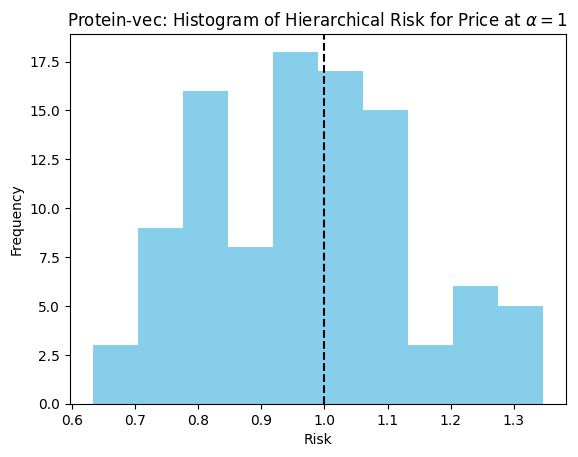

In [12]:
plt.hist(np.array(test_losses), label='Risk', color='skyblue')
plt.axvline(alpha, color='black', linestyle='--')
plt.xlabel('Risk')
plt.ylabel('Frequency')
plt.title(rf'Protein-vec: Histogram of Hierarchical Risk for Price at $\alpha = {alpha}$')


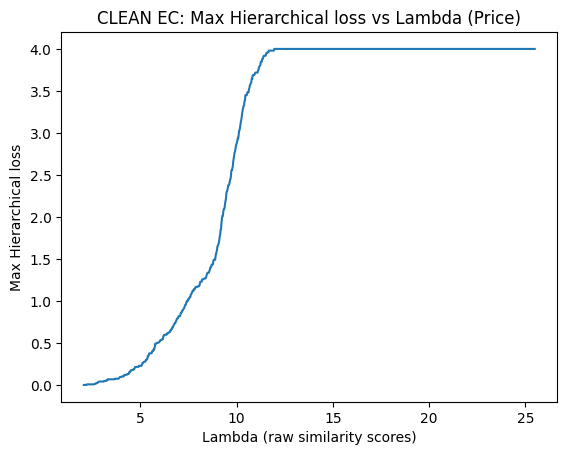

In [13]:
loss = []
for l in x: ## Do not reverse your lambdas, because these are euclidean distances not cosine similarities!
    loss.append(get_hierarchical_max_loss(near_ids, l, sim = "euclidean"))

import matplotlib.pyplot as plt
plt.plot(x, loss)
plt.xlabel('Lambda (raw similarity scores)')
plt.ylabel('Max Hierarchical loss')
plt.title('CLEAN EC: Max Hierarchical loss vs Lambda (Price)')
plt.show()


## evaluate using calibrated lambda to measure precision, recall, etc on holdout test


In [1]:
from clean_utils import infer_conformal, infer_maxsep, infer_pvalue
from protein_conformal.util import get_sims_labels, get_hierarchical_max_loss, get_thresh_max_hierarchical
import numpy as np
near_ids = np.load('clean_new_v_ec_cluster.npy', allow_pickle=True)

sims, _ = get_sims_labels(near_ids, partial=False)

x = np.linspace(min(sims.flatten()), max(sims.flatten()), 1000)
test_data_name = "new"
train_data_name = "split100"

min(x), max(x)



/home/seyonec/.conda/envs/clean/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(0.5880813598632812, 25.599563598632812)

In [3]:
num_trials = 10
alpha = 1 # max avg. loss we want (on average, each protein retrieved is at most divergent at the family level only)
n_calib = 300 # NOTE: 300 calib, 100 test for now.
pre_lst, rec_lst, f1_lst, roc_lst = [], [], [], []
max_sep_pre_lst, max_sep_rec_lst, max_sep_f1_lst, max_sep_roc_lst = [], [], [], []
p_value_pre_lst, p_value_rec_lst, p_value_f1_lst, p_value_roc_lst = [], [], [], []
for trial in range(num_trials):
    # Randomly split data into calibration and test sets
    idx = np.random.permutation(len(near_ids))
    test_idx = idx[n_calib:]
    cal_idx = idx[:n_calib]
    cal_data = near_ids[cal_idx]
    test_data = near_ids[test_idx]
    lhat, _ = get_thresh_max_hierarchical(cal_data, x, alpha, sim = "euclidean")

    test_loss = get_hierarchical_max_loss(test_data, lhat, sim = "euclidean")

    print(f'Trial {trial+1}: Lambda: {lhat:.2f}, Test loss: {test_loss:.2f}')

    pre, rec, f1, roc = infer_conformal(train_data=train_data_name, test_data=test_data_name, thresh=lhat, report_metrics=True, pretrained=True, test_idx=test_idx, name_id=str(trial))
    
    pre_lst.append(pre)
    rec_lst.append(rec)
    f1_lst.append(f1)
    roc_lst.append(roc)

    max_sep_pre, max_sep_rec, max_sep_f1, max_sep_roc = infer_maxsep(train_data=train_data_name, test_data=test_data_name, report_metrics=True, pretrained=True, test_idx=test_idx)

    max_sep_pre_lst.append(max_sep_pre)
    max_sep_rec_lst.append(max_sep_rec)
    max_sep_f1_lst.append(max_sep_f1)
    max_sep_roc_lst.append(max_sep_roc)

    p_value_pre, p_value_rec, p_value_f1, p_value_roc = infer_pvalue(train_data=train_data_name, test_data=test_data_name, report_metrics=True, pretrained=True, test_idx=test_idx)

    p_value_pre_lst.append(p_value_pre)
    p_value_rec_lst.append(p_value_rec)
    p_value_f1_lst.append(p_value_f1)
    p_value_roc_lst.append(p_value_roc)
    


    #error, fraction_inexact, error_partial, fraction_partial = validate_lhat(test_data, lhat)
    #print(f'Trial {trial+1}: Ex&!Id/Ex: {error:.2f}, In/Id: {fraction_inexact:.2f}, Pa&!Id/Pa: {error_partial:.2f}, Pa&Id/Id: {fraction_partial:.2f}')


worst case loss: 4
Loss threshold: 0.99
Best lambda: 7.197722311850425
Loss of best lambda: 0.9533333333333334
Trial 1: Lambda: 7.20, Test loss: 1.00
The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([392, 128])


100%|██████████| 5242/5242 [00:11<00:00, 454.83it/s]


Calculating eval distance map, between 392 test ids and 5242 train EC cluster centers


392it [00:00, 421.76it/s]


############ EC calling results using conformal calibration on randomly shuffled test set ############
---------------------------------------------------------------------------
>>> total samples: 92 | total ec: 68 
>>> precision: 0.519 | recall: 0.628| F1: 0.533 | AUC: 0.804 
---------------------------------------------------------------------------
The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([392, 128])


100%|██████████| 5242/5242 [00:11<00:00, 475.15it/s]


Calculating eval distance map, between 392 test ids and 5242 train EC cluster centers


392it [00:00, 461.01it/s]


############ EC calling results using maximum separation on randomly shuffled test set ############
---------------------------------------------------------------------------
>>> total samples: 92 | total ec: 68 
>>> precision: 0.527 | recall: 0.46| F1: 0.473 | AUC: 0.73 
---------------------------------------------------------------------------
The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([392, 128])


100%|██████████| 5242/5242 [00:10<00:00, 480.20it/s]


Calculating eval distance map, between 392 test ids and 5242 train EC cluster centers


392it [00:00, 422.92it/s]
100%|██████████| 5242/5242 [00:11<00:00, 465.28it/s]
20000it [00:46, 426.83it/s]


############ EC calling results using random chosen 20k samples ############
---------------------------------------------------------------------------
>>> total samples: 92 | total ec: 68 
>>> precision: 0.548 | recall: 0.487| F1: 0.502 | AUC: 0.742 
---------------------------------------------------------------------------
worst case loss: 4
Loss threshold: 0.99
Best lambda: 7.247795349365479
Loss of best lambda: 0.9666666666666667
Trial 2: Lambda: 7.25, Test loss: 1.15
The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([392, 128])


100%|██████████| 5242/5242 [00:11<00:00, 460.08it/s]


Calculating eval distance map, between 392 test ids and 5242 train EC cluster centers


392it [00:00, 434.58it/s]


############ EC calling results using conformal calibration on randomly shuffled test set ############
---------------------------------------------------------------------------
>>> total samples: 92 | total ec: 72 
>>> precision: 0.574 | recall: 0.638| F1: 0.581 | AUC: 0.816 
---------------------------------------------------------------------------
The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([392, 128])


100%|██████████| 5242/5242 [00:11<00:00, 459.49it/s]


Calculating eval distance map, between 392 test ids and 5242 train EC cluster centers


392it [00:00, 434.94it/s]


############ EC calling results using maximum separation on randomly shuffled test set ############
---------------------------------------------------------------------------
>>> total samples: 92 | total ec: 72 
>>> precision: 0.531 | recall: 0.505| F1: 0.514 | AUC: 0.752 
---------------------------------------------------------------------------
The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([392, 128])


100%|██████████| 5242/5242 [00:11<00:00, 459.70it/s]


Calculating eval distance map, between 392 test ids and 5242 train EC cluster centers


392it [00:00, 432.39it/s]
100%|██████████| 5242/5242 [00:10<00:00, 509.77it/s]
20000it [00:45, 442.43it/s]


############ EC calling results using random chosen 20k samples ############
---------------------------------------------------------------------------
>>> total samples: 92 | total ec: 72 
>>> precision: 0.531 | recall: 0.524| F1: 0.523 | AUC: 0.761 
---------------------------------------------------------------------------
worst case loss: 4
Loss threshold: 0.99
Best lambda: 7.247795349365479
Loss of best lambda: 0.9666666666666667
Trial 3: Lambda: 7.25, Test loss: 1.15
The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([392, 128])


100%|██████████| 5242/5242 [00:10<00:00, 497.78it/s]


Calculating eval distance map, between 392 test ids and 5242 train EC cluster centers


392it [00:00, 431.32it/s]


############ EC calling results using conformal calibration on randomly shuffled test set ############
---------------------------------------------------------------------------
>>> total samples: 92 | total ec: 72 
>>> precision: 0.574 | recall: 0.638| F1: 0.581 | AUC: 0.816 
---------------------------------------------------------------------------
The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([392, 128])


100%|██████████| 5242/5242 [00:10<00:00, 498.04it/s]


Calculating eval distance map, between 392 test ids and 5242 train EC cluster centers


392it [00:00, 430.29it/s]


############ EC calling results using maximum separation on randomly shuffled test set ############
---------------------------------------------------------------------------
>>> total samples: 92 | total ec: 72 
>>> precision: 0.531 | recall: 0.505| F1: 0.514 | AUC: 0.752 
---------------------------------------------------------------------------
The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([392, 128])


100%|██████████| 5242/5242 [00:11<00:00, 455.22it/s]


Calculating eval distance map, between 392 test ids and 5242 train EC cluster centers


392it [00:00, 429.61it/s]
100%|██████████| 5242/5242 [00:11<00:00, 450.90it/s]
20000it [00:47, 420.79it/s]


############ EC calling results using random chosen 20k samples ############
---------------------------------------------------------------------------
>>> total samples: 92 | total ec: 72 
>>> precision: 0.531 | recall: 0.524| F1: 0.523 | AUC: 0.761 
---------------------------------------------------------------------------
worst case loss: 4
Loss threshold: 0.99
Best lambda: 7.247795349365479
Loss of best lambda: 0.9666666666666667
Trial 4: Lambda: 7.25, Test loss: 1.15
The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([392, 128])


100%|██████████| 5242/5242 [00:12<00:00, 434.29it/s]


Calculating eval distance map, between 392 test ids and 5242 train EC cluster centers


392it [00:00, 417.88it/s]


############ EC calling results using conformal calibration on randomly shuffled test set ############
---------------------------------------------------------------------------
>>> total samples: 92 | total ec: 72 
>>> precision: 0.574 | recall: 0.638| F1: 0.581 | AUC: 0.816 
---------------------------------------------------------------------------
The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([392, 128])


100%|██████████| 5242/5242 [00:11<00:00, 449.93it/s]


Calculating eval distance map, between 392 test ids and 5242 train EC cluster centers


392it [00:00, 431.10it/s]


############ EC calling results using maximum separation on randomly shuffled test set ############
---------------------------------------------------------------------------
>>> total samples: 92 | total ec: 72 
>>> precision: 0.531 | recall: 0.505| F1: 0.514 | AUC: 0.752 
---------------------------------------------------------------------------
The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([392, 128])


100%|██████████| 5242/5242 [00:11<00:00, 451.05it/s]


Calculating eval distance map, between 392 test ids and 5242 train EC cluster centers


392it [00:00, 418.07it/s]
100%|██████████| 5242/5242 [00:11<00:00, 438.19it/s]
20000it [00:46, 425.96it/s]


############ EC calling results using random chosen 20k samples ############
---------------------------------------------------------------------------
>>> total samples: 92 | total ec: 72 
>>> precision: 0.531 | recall: 0.524| F1: 0.523 | AUC: 0.761 
---------------------------------------------------------------------------
worst case loss: 4
Loss threshold: 0.99
Best lambda: 7.247795349365479
Loss of best lambda: 0.9666666666666667
Trial 5: Lambda: 7.25, Test loss: 1.15
The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([392, 128])


100%|██████████| 5242/5242 [00:10<00:00, 500.68it/s]


Calculating eval distance map, between 392 test ids and 5242 train EC cluster centers


392it [00:00, 489.51it/s]


############ EC calling results using conformal calibration on randomly shuffled test set ############
---------------------------------------------------------------------------
>>> total samples: 92 | total ec: 72 
>>> precision: 0.574 | recall: 0.638| F1: 0.581 | AUC: 0.816 
---------------------------------------------------------------------------
The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([392, 128])


100%|██████████| 5242/5242 [00:09<00:00, 552.01it/s]


Calculating eval distance map, between 392 test ids and 5242 train EC cluster centers


392it [00:00, 433.97it/s]


############ EC calling results using maximum separation on randomly shuffled test set ############
---------------------------------------------------------------------------
>>> total samples: 92 | total ec: 72 
>>> precision: 0.531 | recall: 0.505| F1: 0.514 | AUC: 0.752 
---------------------------------------------------------------------------
The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([392, 128])


100%|██████████| 5242/5242 [00:10<00:00, 496.56it/s]


Calculating eval distance map, between 392 test ids and 5242 train EC cluster centers


392it [00:00, 434.73it/s]
100%|██████████| 5242/5242 [00:10<00:00, 496.60it/s]
20000it [00:45, 438.35it/s]


############ EC calling results using random chosen 20k samples ############
---------------------------------------------------------------------------
>>> total samples: 92 | total ec: 72 
>>> precision: 0.531 | recall: 0.524| F1: 0.523 | AUC: 0.761 
---------------------------------------------------------------------------
worst case loss: 4
Loss threshold: 0.99
Best lambda: 7.247795349365479
Loss of best lambda: 0.9666666666666667
Trial 6: Lambda: 7.25, Test loss: 1.15
The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([392, 128])


100%|██████████| 5242/5242 [00:11<00:00, 458.02it/s]


Calculating eval distance map, between 392 test ids and 5242 train EC cluster centers


392it [00:00, 435.93it/s]


############ EC calling results using conformal calibration on randomly shuffled test set ############
---------------------------------------------------------------------------
>>> total samples: 92 | total ec: 72 
>>> precision: 0.574 | recall: 0.638| F1: 0.581 | AUC: 0.816 
---------------------------------------------------------------------------
The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([392, 128])


100%|██████████| 5242/5242 [00:11<00:00, 458.63it/s]


Calculating eval distance map, between 392 test ids and 5242 train EC cluster centers


392it [00:00, 434.27it/s]


############ EC calling results using maximum separation on randomly shuffled test set ############
---------------------------------------------------------------------------
>>> total samples: 92 | total ec: 72 
>>> precision: 0.531 | recall: 0.505| F1: 0.514 | AUC: 0.752 
---------------------------------------------------------------------------
The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([392, 128])


100%|██████████| 5242/5242 [00:10<00:00, 484.30it/s]


Calculating eval distance map, between 392 test ids and 5242 train EC cluster centers


392it [00:00, 433.42it/s]
100%|██████████| 5242/5242 [00:08<00:00, 588.09it/s]
20000it [00:44, 450.73it/s]


############ EC calling results using random chosen 20k samples ############
---------------------------------------------------------------------------
>>> total samples: 92 | total ec: 72 
>>> precision: 0.531 | recall: 0.524| F1: 0.523 | AUC: 0.761 
---------------------------------------------------------------------------
worst case loss: 4
Loss threshold: 0.99
Best lambda: 7.247795349365479
Loss of best lambda: 0.9666666666666667
Trial 7: Lambda: 7.25, Test loss: 1.15
The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([392, 128])


100%|██████████| 5242/5242 [00:11<00:00, 461.15it/s]


Calculating eval distance map, between 392 test ids and 5242 train EC cluster centers


392it [00:00, 434.73it/s]


############ EC calling results using conformal calibration on randomly shuffled test set ############
---------------------------------------------------------------------------
>>> total samples: 92 | total ec: 72 
>>> precision: 0.574 | recall: 0.638| F1: 0.581 | AUC: 0.816 
---------------------------------------------------------------------------
The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([392, 128])


100%|██████████| 5242/5242 [00:11<00:00, 459.62it/s]


Calculating eval distance map, between 392 test ids and 5242 train EC cluster centers


392it [00:00, 435.95it/s]


############ EC calling results using maximum separation on randomly shuffled test set ############
---------------------------------------------------------------------------
>>> total samples: 92 | total ec: 72 
>>> precision: 0.531 | recall: 0.505| F1: 0.514 | AUC: 0.752 
---------------------------------------------------------------------------
The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([392, 128])


100%|██████████| 5242/5242 [00:10<00:00, 476.68it/s]


Calculating eval distance map, between 392 test ids and 5242 train EC cluster centers


392it [00:00, 475.31it/s]
100%|██████████| 5242/5242 [00:09<00:00, 532.63it/s]
20000it [00:45, 442.10it/s]


############ EC calling results using random chosen 20k samples ############
---------------------------------------------------------------------------
>>> total samples: 92 | total ec: 72 
>>> precision: 0.531 | recall: 0.524| F1: 0.523 | AUC: 0.761 
---------------------------------------------------------------------------
worst case loss: 4
Loss threshold: 0.99
Best lambda: 7.247795349365479
Loss of best lambda: 0.9666666666666667
Trial 8: Lambda: 7.25, Test loss: 1.15
The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([392, 128])


100%|██████████| 5242/5242 [00:11<00:00, 462.19it/s]


Calculating eval distance map, between 392 test ids and 5242 train EC cluster centers


392it [00:00, 434.51it/s]


############ EC calling results using conformal calibration on randomly shuffled test set ############
---------------------------------------------------------------------------
>>> total samples: 92 | total ec: 72 
>>> precision: 0.574 | recall: 0.638| F1: 0.581 | AUC: 0.816 
---------------------------------------------------------------------------
The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([392, 128])


100%|██████████| 5242/5242 [00:11<00:00, 457.27it/s]


Calculating eval distance map, between 392 test ids and 5242 train EC cluster centers


392it [00:00, 434.20it/s]


############ EC calling results using maximum separation on randomly shuffled test set ############
---------------------------------------------------------------------------
>>> total samples: 92 | total ec: 72 
>>> precision: 0.531 | recall: 0.505| F1: 0.514 | AUC: 0.752 
---------------------------------------------------------------------------
The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([392, 128])


100%|██████████| 5242/5242 [00:11<00:00, 457.24it/s]


Calculating eval distance map, between 392 test ids and 5242 train EC cluster centers


392it [00:00, 473.21it/s]
100%|██████████| 5242/5242 [00:09<00:00, 525.60it/s]
20000it [00:45, 444.26it/s]


############ EC calling results using random chosen 20k samples ############
---------------------------------------------------------------------------
>>> total samples: 92 | total ec: 72 
>>> precision: 0.531 | recall: 0.524| F1: 0.523 | AUC: 0.761 
---------------------------------------------------------------------------
worst case loss: 4
Loss threshold: 0.99
Best lambda: 7.247795349365479
Loss of best lambda: 0.9666666666666667
Trial 9: Lambda: 7.25, Test loss: 1.15
The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([392, 128])


100%|██████████| 5242/5242 [00:09<00:00, 529.04it/s]


Calculating eval distance map, between 392 test ids and 5242 train EC cluster centers


392it [00:00, 446.08it/s]


############ EC calling results using conformal calibration on randomly shuffled test set ############
---------------------------------------------------------------------------
>>> total samples: 92 | total ec: 72 
>>> precision: 0.574 | recall: 0.638| F1: 0.581 | AUC: 0.816 
---------------------------------------------------------------------------
The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([392, 128])


100%|██████████| 5242/5242 [00:08<00:00, 628.60it/s] 


Calculating eval distance map, between 392 test ids and 5242 train EC cluster centers


392it [00:00, 431.05it/s]


############ EC calling results using maximum separation on randomly shuffled test set ############
---------------------------------------------------------------------------
>>> total samples: 92 | total ec: 72 
>>> precision: 0.531 | recall: 0.505| F1: 0.514 | AUC: 0.752 
---------------------------------------------------------------------------
The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([392, 128])


100%|██████████| 5242/5242 [00:09<00:00, 560.87it/s]


Calculating eval distance map, between 392 test ids and 5242 train EC cluster centers


392it [00:00, 440.45it/s]
100%|██████████| 5242/5242 [00:10<00:00, 508.25it/s]
20000it [00:46, 433.47it/s]


############ EC calling results using random chosen 20k samples ############
---------------------------------------------------------------------------
>>> total samples: 92 | total ec: 72 
>>> precision: 0.531 | recall: 0.524| F1: 0.523 | AUC: 0.761 
---------------------------------------------------------------------------
worst case loss: 4
Loss threshold: 0.99
Best lambda: 7.247795349365479
Loss of best lambda: 0.9666666666666667
Trial 10: Lambda: 7.25, Test loss: 1.15
The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([392, 128])


100%|██████████| 5242/5242 [00:08<00:00, 644.12it/s]


Calculating eval distance map, between 392 test ids and 5242 train EC cluster centers


392it [00:00, 437.30it/s]


############ EC calling results using conformal calibration on randomly shuffled test set ############
---------------------------------------------------------------------------
>>> total samples: 92 | total ec: 72 
>>> precision: 0.574 | recall: 0.638| F1: 0.581 | AUC: 0.816 
---------------------------------------------------------------------------
The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([392, 128])


100%|██████████| 5242/5242 [00:09<00:00, 580.78it/s]


Calculating eval distance map, between 392 test ids and 5242 train EC cluster centers


392it [00:00, 480.72it/s]


############ EC calling results using maximum separation on randomly shuffled test set ############
---------------------------------------------------------------------------
>>> total samples: 92 | total ec: 72 
>>> precision: 0.531 | recall: 0.505| F1: 0.514 | AUC: 0.752 
---------------------------------------------------------------------------
The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([392, 128])


100%|██████████| 5242/5242 [00:10<00:00, 523.48it/s]


Calculating eval distance map, between 392 test ids and 5242 train EC cluster centers


392it [00:00, 449.27it/s]
100%|██████████| 5242/5242 [00:07<00:00, 671.48it/s]
20000it [00:43, 457.31it/s]


############ EC calling results using random chosen 20k samples ############
---------------------------------------------------------------------------
>>> total samples: 92 | total ec: 72 
>>> precision: 0.531 | recall: 0.524| F1: 0.523 | AUC: 0.761 
---------------------------------------------------------------------------


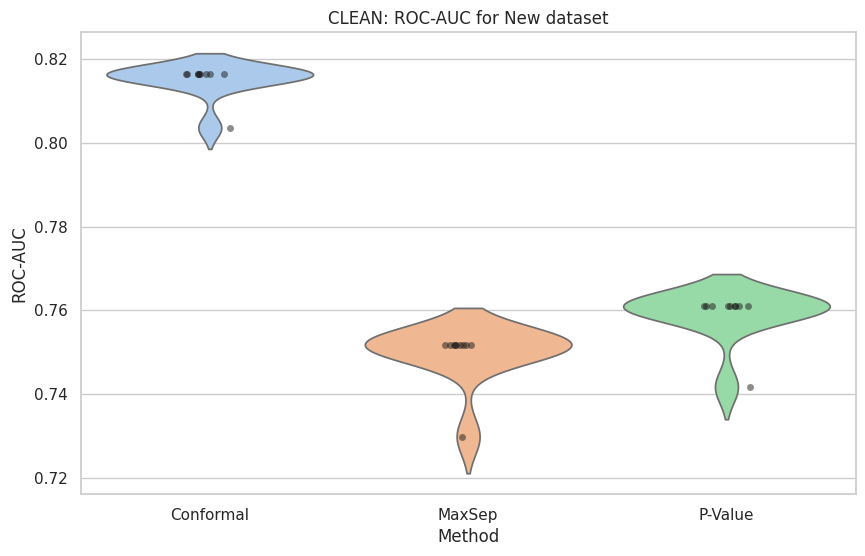

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming roc_lst, max_sep_roc_lst, and p_value_roc_lst are already defined
# Example data
# roc_lst = [0.9, 0.85, 0.87, ...]
# max_sep_roc_lst = [0.88, 0.89, 0.86, ...]
# p_value_roc_lst = [0.92, 0.91, 0.90, ...]

data = {'Conformal': roc_lst, 'MaxSep': max_sep_roc_lst, 'P-Value': p_value_roc_lst}
def make_violin(data, output_file, metric):
    df = pd.DataFrame(data)

    # Melt the DataFrame to long-form for seaborn
    df_melted = df.melt(var_name='Method', value_name=metric)

    # Set the style
    sns.set(style="whitegrid")

    # Create the violin plot with lighter color scheme
    plt.figure(figsize=(10, 6))
    palette = sns.color_palette("pastel")

    # Generate violin plot
    sns.violinplot(x='Method', y=metric, data=df_melted, palette=palette, inner=None)

    # Add individual data points
    sns.stripplot(x='Method', y=metric, data=df_melted, color='k', alpha=0.5, jitter=True)

    plt.ylabel(metric)
    plt.title(f'CLEAN: {metric} for New dataset')
    # save the plot
    plt.savefig(output_file)
    plt.show()
    

make_violin(data, 'clean_new_roc_auc_violin_plot.pdf', "ROC-AUC")

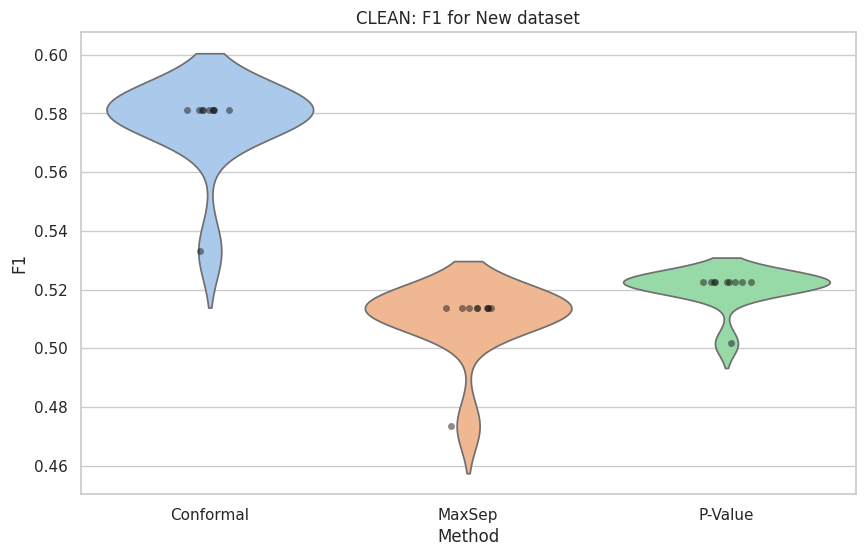

In [18]:
data = {'Conformal': f1_lst, 'MaxSep': max_sep_f1_lst, 'P-Value': p_value_f1_lst}

make_violin(data, 'clean_new_f1_violin_plot.pdf', "F1")

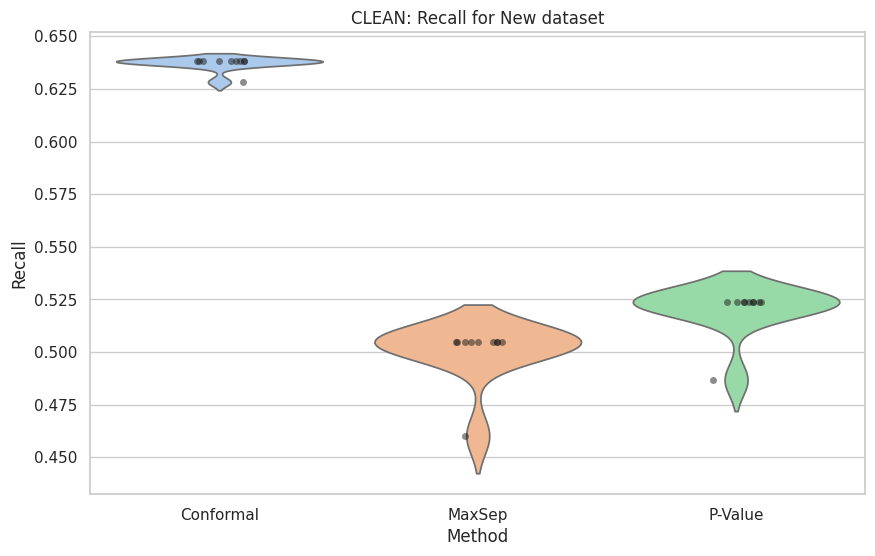

In [19]:
data = {'Conformal': rec_lst, 'MaxSep': max_sep_rec_lst, 'P-Value': p_value_rec_lst}

make_violin(data, 'clean_new_rec_violin_plot.pdf', "Recall")

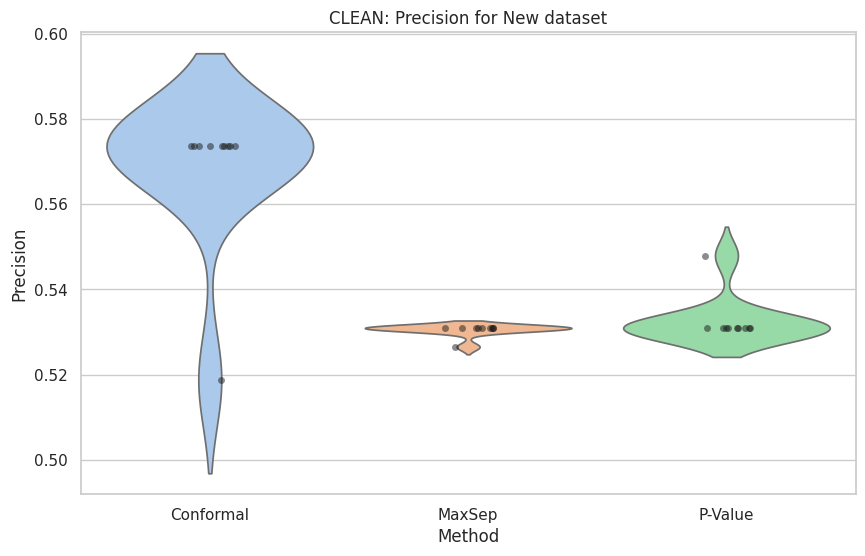

In [20]:
data = {'Conformal': pre_lst, 'MaxSep': max_sep_pre_lst, 'P-Value': p_value_pre_lst}

make_violin(data, 'clean_new_pre_violin_plot.pdf', "Precision")

In [23]:
# take mean of each metric and print

print(f'Conformal: Precision: {np.mean(pre_lst):.4f}, Recall: {np.mean(rec_lst):.4f}, F1: {np.mean(f1_lst):.4f}, ROC-AUC: {np.mean(roc_lst):.4f}')
print(f'MaxSep: Precision: {np.mean(max_sep_pre_lst):.4f}, Recall: {np.mean(max_sep_rec_lst):.4f}, F1: {np.mean(max_sep_f1_lst):.4f}, ROC-AUC: {np.mean(max_sep_roc_lst):.4f}')
print(f'P-Value: Precision: {np.mean(p_value_pre_lst):.4f}, Recall: {np.mean(p_value_rec_lst):.4f}, F1: {np.mean(p_value_f1_lst):.4f}, ROC-AUC: {np.mean(p_value_roc_lst):.4f}')


Conformal: Precision: 0.5680, Recall: 0.6371, F1: 0.5765, ROC-AUC: 0.8150
MaxSep: Precision: 0.5305, Recall: 0.5003, F1: 0.5096, ROC-AUC: 0.7496
P-Value: Precision: 0.5327, Recall: 0.5201, F1: 0.5204, ROC-AUC: 0.7590


In [24]:
# do the same as above but for std
print(f'Conformal: Precision: {np.std(pre_lst):.4f}, Recall: {np.std(rec_lst):.4f}, F1: {np.std(f1_lst):.4f}, ROC-AUC: {np.std(roc_lst):.4f}')
print(f'MaxSep: Precision: {np.std(max_sep_pre_lst):.4f}, Recall: {np.std(max_sep_rec_lst):.4f}, F1: {np.std(max_sep_f1_lst):.4f}, ROC-AUC: {np.std(max_sep_roc_lst):.4f}')
print(f'P-Value: Precision: {np.std(p_value_pre_lst):.4f}, Recall: {np.std(p_value_rec_lst):.4f}, F1: {np.std(p_value_f1_lst):.4f}, ROC-AUC: {np.std(p_value_roc_lst):.4f}')

Conformal: Precision: 0.0164, Recall: 0.0029, F1: 0.0145, ROC-AUC: 0.0038
MaxSep: Precision: 0.0013, Recall: 0.0134, F1: 0.0121, ROC-AUC: 0.0066
P-Value: Precision: 0.0051, Recall: 0.0111, F1: 0.0063, ROC-AUC: 0.0058


In [4]:
## save all the metrics
import pickle
with open('new_v_ec_metrics.pkl', 'wb') as f:
    pickle.dump([pre_lst, rec_lst, f1_lst, roc_lst, max_sep_pre_lst, max_sep_rec_lst, max_sep_f1_lst, max_sep_roc_lst, p_value_pre_lst, p_value_rec_lst, p_value_f1_lst, p_value_roc_lst], f)


In [4]:
from clean_utils import infer_maxsep
infer_maxsep(train_data=train_data_name, test_data=test_data_name, report_metrics=True, pretrained=True, test_idx=test_idx)


The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([392, 128])


100%|██████████| 5242/5242 [00:00<00:00, 31048.65it/s]


Calculating eval distance map, between 392 test ids and 5242 train EC cluster centers


392it [00:00, 784.49it/s]


############ EC calling results using maximum separation on randomly shuffled test set ############
---------------------------------------------------------------------------
>>> total samples: 92 | total ec: 77 
>>> precision: 0.55 | recall: 0.523| F1: 0.534 | AUC: 0.761 
---------------------------------------------------------------------------


### Calibrate on new, test on price

In [7]:
from clean_utils import infer_conformal
from protein_conformal.util import get_sims_labels, get_hierarchical_max_loss, get_thresh_max_hierarchical
import numpy as np
near_ids = np.load('clean_new_v_ec_cluster.npy', allow_pickle=True)

sims, _ = get_sims_labels(near_ids, partial=False)

x = np.linspace(min(sims.flatten()), max(sims.flatten()), 1000)
test_data_name = "new"
train_data_name = "split100"

min(x), max(x)



(0.5880813598632812, 25.599563598632812)

In [8]:
import numpy as np
num_trials = 10
alpha = 1.5 # max avg. loss we want (on average, each protein retrieved is at most divergent 50% of the time at the family level, 50% at the subfamily level)
n_calib = 370 # NOTE: 370 calib, 22 test for now, because we want to max calib data to then test on price
for trial in range(num_trials):
    # Randomly split data into calibration and test sets
    idx = np.random.permutation(len(near_ids))
    test_idx = idx[n_calib:]
    cal_idx = idx[:n_calib]
    cal_data = near_ids[cal_idx]
    test_data = near_ids[test_idx]
    lhat, _ = get_thresh_max_hierarchical(cal_data, x, alpha, sim = "euclidean")

    test_loss = get_hierarchical_max_loss(test_data, lhat, sim = "euclidean")

    print(f'Trial {trial+1}: Lambda: {lhat:.2f}, Test loss: {test_loss:.2f}')

    infer_conformal(train_data=train_data_name, test_data=test_data_name, thresh=lhat, report_metrics=True, pretrained=True, test_idx=test_idx, name_id=str(trial))
    
    #error, fraction_inexact, error_partial, fraction_partial = validate_lhat(test_data, lhat)
    #print(f'Trial {trial+1}: Ex&!Id/Ex: {error:.2f}, In/Id: {fraction_inexact:.2f}, Pa&!Id/Pa: {error_partial:.2f}, Pa&Id/Id: {fraction_partial:.2f}')

worst case loss: 4
Loss threshold: 1.4932432432432432
Best lambda: 7.773562243273547
Loss of best lambda: 1.4837837837837837
Trial 1: Lambda: 7.77, Test loss: 1.27
The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([392, 128])


 14%|█▍        | 737/5242 [00:01<00:09, 454.31it/s]

100%|██████████| 5242/5242 [00:11<00:00, 456.04it/s]


Calculating eval distance map, between 392 test ids and 5242 train EC cluster centers


392it [00:00, 433.39it/s]


############ EC calling results using conformal calibration on randomly shuffled test set ############
---------------------------------------------------------------------------
>>> total samples: 22 | total ec: 21 
>>> precision: 0.645 | recall: 0.739| F1: 0.674 | AUC: 0.865 
---------------------------------------------------------------------------
worst case loss: 4
Loss threshold: 1.4932432432432432
Best lambda: 7.773562243273547
Loss of best lambda: 1.4783783783783784
Trial 2: Lambda: 7.77, Test loss: 1.36
The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([392, 128])


100%|██████████| 5242/5242 [00:11<00:00, 454.98it/s]


Calculating eval distance map, between 392 test ids and 5242 train EC cluster centers


392it [00:00, 434.19it/s]


############ EC calling results using conformal calibration on randomly shuffled test set ############
---------------------------------------------------------------------------
>>> total samples: 22 | total ec: 20 
>>> precision: 0.659 | recall: 0.682| F1: 0.667 | AUC: 0.84 
---------------------------------------------------------------------------
worst case loss: 4
Loss threshold: 1.4932432432432432
Best lambda: 7.773562243273547
Loss of best lambda: 1.4783783783783784
Trial 3: Lambda: 7.77, Test loss: 1.36
The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([392, 128])


100%|██████████| 5242/5242 [00:11<00:00, 468.89it/s]


Calculating eval distance map, between 392 test ids and 5242 train EC cluster centers


392it [00:00, 438.34it/s]


############ EC calling results using conformal calibration on randomly shuffled test set ############
---------------------------------------------------------------------------
>>> total samples: 22 | total ec: 20 
>>> precision: 0.659 | recall: 0.682| F1: 0.667 | AUC: 0.84 
---------------------------------------------------------------------------
worst case loss: 4
Loss threshold: 1.4932432432432432
Best lambda: 7.773562243273547
Loss of best lambda: 1.4783783783783784
Trial 4: Lambda: 7.77, Test loss: 1.36
The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([392, 128])


100%|██████████| 5242/5242 [00:11<00:00, 474.96it/s]


Calculating eval distance map, between 392 test ids and 5242 train EC cluster centers


392it [00:00, 437.99it/s]


############ EC calling results using conformal calibration on randomly shuffled test set ############
---------------------------------------------------------------------------
>>> total samples: 22 | total ec: 20 
>>> precision: 0.659 | recall: 0.682| F1: 0.667 | AUC: 0.84 
---------------------------------------------------------------------------
worst case loss: 4
Loss threshold: 1.4932432432432432
Best lambda: 7.773562243273547
Loss of best lambda: 1.4783783783783784
Trial 5: Lambda: 7.77, Test loss: 1.36
The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([392, 128])


100%|██████████| 5242/5242 [00:11<00:00, 472.93it/s]


Calculating eval distance map, between 392 test ids and 5242 train EC cluster centers


392it [00:00, 430.85it/s]


############ EC calling results using conformal calibration on randomly shuffled test set ############
---------------------------------------------------------------------------
>>> total samples: 22 | total ec: 20 
>>> precision: 0.659 | recall: 0.682| F1: 0.667 | AUC: 0.84 
---------------------------------------------------------------------------
worst case loss: 4
Loss threshold: 1.4932432432432432
Best lambda: 7.773562243273547
Loss of best lambda: 1.4783783783783784
Trial 6: Lambda: 7.77, Test loss: 1.36
The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([392, 128])


100%|██████████| 5242/5242 [00:11<00:00, 476.49it/s]


Calculating eval distance map, between 392 test ids and 5242 train EC cluster centers


392it [00:00, 435.73it/s]


############ EC calling results using conformal calibration on randomly shuffled test set ############
---------------------------------------------------------------------------
>>> total samples: 22 | total ec: 20 
>>> precision: 0.659 | recall: 0.682| F1: 0.667 | AUC: 0.84 
---------------------------------------------------------------------------
worst case loss: 4
Loss threshold: 1.4932432432432432
Best lambda: 7.773562243273547
Loss of best lambda: 1.4783783783783784
Trial 7: Lambda: 7.77, Test loss: 1.36
The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([392, 128])


100%|██████████| 5242/5242 [00:11<00:00, 475.39it/s]


Calculating eval distance map, between 392 test ids and 5242 train EC cluster centers


392it [00:00, 434.62it/s]


############ EC calling results using conformal calibration on randomly shuffled test set ############
---------------------------------------------------------------------------
>>> total samples: 22 | total ec: 20 
>>> precision: 0.659 | recall: 0.682| F1: 0.667 | AUC: 0.84 
---------------------------------------------------------------------------
worst case loss: 4
Loss threshold: 1.4932432432432432
Best lambda: 7.773562243273547
Loss of best lambda: 1.4783783783783784
Trial 8: Lambda: 7.77, Test loss: 1.36
The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([392, 128])


100%|██████████| 5242/5242 [00:10<00:00, 482.61it/s]


Calculating eval distance map, between 392 test ids and 5242 train EC cluster centers


392it [00:00, 437.94it/s]


############ EC calling results using conformal calibration on randomly shuffled test set ############
---------------------------------------------------------------------------
>>> total samples: 22 | total ec: 20 
>>> precision: 0.659 | recall: 0.682| F1: 0.667 | AUC: 0.84 
---------------------------------------------------------------------------
worst case loss: 4
Loss threshold: 1.4932432432432432
Best lambda: 7.773562243273547
Loss of best lambda: 1.4783783783783784
Trial 9: Lambda: 7.77, Test loss: 1.36
The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([392, 128])


100%|██████████| 5242/5242 [00:10<00:00, 490.51it/s]


Calculating eval distance map, between 392 test ids and 5242 train EC cluster centers


392it [00:00, 440.07it/s]


############ EC calling results using conformal calibration on randomly shuffled test set ############
---------------------------------------------------------------------------
>>> total samples: 22 | total ec: 20 
>>> precision: 0.659 | recall: 0.682| F1: 0.667 | AUC: 0.84 
---------------------------------------------------------------------------
worst case loss: 4
Loss threshold: 1.4932432432432432
Best lambda: 7.773562243273547
Loss of best lambda: 1.4783783783783784
Trial 10: Lambda: 7.77, Test loss: 1.36
The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([392, 128])


100%|██████████| 5242/5242 [00:10<00:00, 480.65it/s]


Calculating eval distance map, between 392 test ids and 5242 train EC cluster centers


392it [00:00, 438.81it/s]


############ EC calling results using conformal calibration on randomly shuffled test set ############
---------------------------------------------------------------------------
>>> total samples: 22 | total ec: 20 
>>> precision: 0.659 | recall: 0.682| F1: 0.667 | AUC: 0.84 
---------------------------------------------------------------------------


In [9]:
# best lhat from calibrating on New
lhat = 7.773562243273547

In [10]:
from clean_utils import infer_maxsep
train_data_name = "split100"
test_data_name = "price"
print(infer_maxsep(train_data=train_data_name, test_data=test_data_name, report_metrics=True, pretrained=True, test_idx=None))


The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([149, 128])


 37%|███▋      | 1940/5242 [00:04<00:06, 483.07it/s]

100%|██████████| 5242/5242 [00:10<00:00, 482.45it/s]


Calculating eval distance map, between 149 test ids and 5242 train EC cluster centers


149it [00:00, 436.99it/s]


############ EC calling results using maximum separation on randomly shuffled test set ############
---------------------------------------------------------------------------
>>> total samples: 149 | total ec: 56 
>>> precision: 0.584 | recall: 0.467| F1: 0.495 | AUC: 0.733 
---------------------------------------------------------------------------
(0.5844298245614035, 0.46710526315789475, 0.4947394527986633, 0.7334186697438577)


In [11]:
print(infer_conformal(train_data=train_data_name, test_data="price", thresh=lhat, report_metrics=True, pretrained=True, test_idx=None, name_id='test_generalization_from_new'))
#infer_conformal(train_data=train_data_name, test_data=test_data_name, thresh=lhat, report_metrics=True, pretrained=True, test_idx=test_idx)

The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([149, 128])


100%|██████████| 5242/5242 [00:10<00:00, 482.17it/s]


Calculating eval distance map, between 149 test ids and 5242 train EC cluster centers


149it [00:00, 433.82it/s]


############ EC calling results using conformal calibration on randomly shuffled test set ############
---------------------------------------------------------------------------
>>> total samples: 149 | total ec: 56 
>>> precision: 0.56 | recall: 0.493| F1: 0.496 | AUC: 0.746 
---------------------------------------------------------------------------
(0.5597587719298245, 0.4934210526315789, 0.4962197159565581, 0.7458652887059343)


In [12]:
from clean_utils import infer_pvalue
print(infer_pvalue(train_data=train_data_name, test_data="price", report_metrics=True, pretrained=True, test_idx=None))

The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([149, 128])


100%|██████████| 5242/5242 [00:11<00:00, 460.80it/s]


Calculating eval distance map, between 149 test ids and 5242 train EC cluster centers


149it [00:00, 436.81it/s]
100%|██████████| 5242/5242 [00:11<00:00, 463.15it/s]
20000it [00:46, 433.30it/s]


############ EC calling results using random chosen 20k samples ############
---------------------------------------------------------------------------
>>> total samples: 149 | total ec: 56 
>>> precision: 0.593 | recall: 0.447| F1: 0.478 | AUC: 0.723 
---------------------------------------------------------------------------
(0.5926535087719298, 0.4473684210526316, 0.4776524644945698, 0.7233903050397411)


In [8]:
infer_maxsep(train_data=train_data_name, test_data="price", report_metrics=True, pretrained=True, test_idx=None)


The embedding sizes for train and test: torch.Size([241025, 128]) torch.Size([149, 128])


100%|██████████| 5242/5242 [00:00<00:00, 40661.60it/s]


Calculating eval distance map, between 149 test ids and 5242 train EC cluster centers


149it [00:00, 1576.15it/s]


############ EC calling results using maximum separation on randomly shuffled test set ############
---------------------------------------------------------------------------
>>> total samples: 149 | total ec: 56 
>>> precision: 0.584 | recall: 0.467| F1: 0.495 | AUC: 0.733 
---------------------------------------------------------------------------
